In [3]:
%matplotlib inline
import numpy as np
from pylab import figure, imshow, title, colorbar
np.set_printoptions(threshold=np.nan)

In [4]:
# Initial Conditions
n = 100
u0 = np.zeros((n,n)) # velocity in x direction - still water
v0 = np.zeros((n,n)) # velocity in y direction - still water

# eta (like height) will be uniform with a perturbation in the center
eta_start = np.ones((n,n)) # pressure deviation (like height)
x,y = np.mgrid[:n,:n]
droplet_x, droplet_y = n/2, n/2
rr = (x-droplet_x)**2 + (y-droplet_y)**2
eta_start[rr<10**2] = 1.1 # add a perturbation in pressure surface

# Parameters describing simulation
box_size = 1.
dx =  1.0*box_size / n
dy = 1.0*box_size / n
g = 1. # Gravity
dt = dx / 100.
t = 0
nt = int(t/dt) + 1


x = np.linspace(0, 99, n)
y = np.linspace(0, 99, n)

In [5]:
def computeH(n, eta_start):
    
    h = eta_start
    
    u = np.zeros((n,n))
    
    v = np.zeros((n,n))
    
    return np.array([h, u, v])

In [6]:
H = computeH(n, eta_start)

In [7]:
def computeU(H):
    
    U1 = H[1]
    
    U2 = H[0]
    
    U3 = np.zeros((n,n))
    
    return np.array([U1, g*U2, U3])

In [8]:
U = computeU(H)

In [9]:
def computeV(H):
    
    V1 = H[2]
    
    V2 = np.zeros((n,n))
    
    V3 = H[0]
    
    return np.array([V1, V2, g*V3])

In [10]:
V = computeV(H)

In [11]:
H_n = np.zeros((3, nt, n, n))

for t in range(0, nt):
    H_n[:,t,:,:] = H[:,:,:]
    
for t in range(1,nt):
    U = computeU(H)
    V = computeV(H)
    H_n[:,t,1:-1,1:-1] = H[:,1:-1,1:-1] + dt*( (U[:,2:,1:-1] - U[:,:-2,1:-1])/(2*dx) + \
                                              (V[:,1:-1,2:] - V[:,1:-1,:-2])/(2*dy) )
    H = H_n[:,t,:,:].copy()
    
    

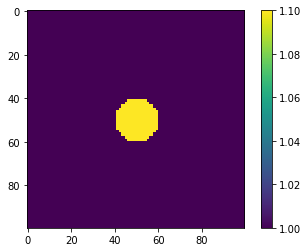

In [12]:
imshow(H[0]); colorbar()

In [24]:
whos

Variable    Type        Data/Info
---------------------------------
H           ndarray     3x100x100: 30000 elems, type `float64`, 240000 bytes (234.375 kb)
H_n         ndarray     3x9001x100x100: 270030000 elems, type `float64`, 2160240000 bytes (2060.1654052734375 Mb)
U           ndarray     3x100x100: 30000 elems, type `float64`, 240000 bytes (234.375 kb)
V           ndarray     3x100x100: 30000 elems, type `float64`, 240000 bytes (234.375 kb)
box_size    float       1.0
colorbar    function    <function colorbar at 0x1158e4ae8>
computeH    function    <function computeH at 0x115915f28>
computeU    function    <function computeU at 0x117b6f158>
computeV    function    <function computeV at 0x117b6f510>
droplet_x   float       50.0
droplet_y   float       50.0
dt          float       0.0001
dx          float       0.01
dy          float       0.01
eta_start   ndarray     100x100: 10000 elems, type `float64`, 80000 bytes
figure      function    <function figure at 0x11586fae8>
g     